In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv('../Data/bna_weather.csv')

In [3]:
bus = pd.read_csv('../Data/headway_data.csv', index_col= False)

Remove an unnamed column that was on the csv file

In [4]:
bus = bus.loc[:, ~bus.columns.str.match('^Unnamed:')]

Convert the date column values to datetime format

In [5]:
bus['DATE'] = pd.to_datetime(bus['DATE'])

.info() to look at the data

In [6]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350328 entries, 0 to 350327
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350328 non-null  int64         
 1   SERVICE_ABBR               350328 non-null  int64         
 2   ADHERENCE_ID               350328 non-null  int64         
 3   DATE                       350328 non-null  datetime64[ns]
 4   ROUTE_ABBR                 350328 non-null  int64         
 5   BLOCK_ABBR                 350328 non-null  int64         
 6   OPERATOR                   350328 non-null  int64         
 7   TRIP_ID                    350328 non-null  int64         
 8   OVERLOAD_ID                350328 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350328 non-null  object        
 10  TIME_POINT_ABBR            350328 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350317 non-null  float64 

Ideas: Identify a unique identifier that identifies a trip in a single day!

Michael's suggestion:

    The tripid column is reused across days. If you want a unique identifier for a trip, you'll need to combine the tripid and some kind of date identifier, like date or calendarid.

In [7]:
bus['trip_date'] = bus['TRIP_ID'].astype('str') + bus['CALENDAR_ID'].astype('str')

In [8]:
bus.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,2,6.500000,345104120230801
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,9,0.000000,345104120230801
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,19,0.000000,345104120230801
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,35,0.000000,345104120230801
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,36,12.866666,345105120230801


In [9]:
bus_no_overload = bus[bus['OVERLOAD_ID']==0]

In [10]:
bus['trip_date'].describe()

count              350328
unique              67370
top       353036120230926
freq                   21
Name: trip_date, dtype: object

In [11]:
bus[bus['TRIP_EDGE']==1]['trip_date'].describe()

count               67415
unique              67361
top       350216120230907
freq                    2
Name: trip_date, dtype: object

Total unique trip_id is 67370

of which only 37361 of them have trip_edge =1 (START)


_some entries with trip_id are repeated twice (for starting) and three times (for trip_id =2) at most_

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
bus_start_end = bus_no_overload.groupby(
    ['trip_date','TRIP_EDGE']).filter(
        lambda x: (
            1 in x['TRIP_EDGE'].values) or (
                2 in x['TRIP_EDGE'].values))



In [13]:
bus_start_end

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,trip_date
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,2,6.500000,345104120230801
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,35,0.000000,345104120230801
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,36,12.866666,345105120230801
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,NaN,0,62,0.000000,345105120230801
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,345106120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350321,120230930,2,100406608,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,...,NaN,0,1,0,0,NaN,0,529,0.000000,353447120230930
350322,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,4.916666,0,1,0,0,0.0,0,530,1.966666,353448120230930
350324,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,551,0.000000,353448120230930
350325,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,552,0.000000,353449120230930


In [14]:
bus_start_end_grouped =  bus_start_end.groupby(['trip_date','TRIP_EDGE'])['ADHERENCE'].apply(list).reset_index()

In [15]:
bus_start_end_grouped

,trip_date,TRIP_EDGE,ADHERENCE
0,345104120230801,1,[-2.133333]
1,345104120230801,2,[6.283333]
2,345104120230802,1,[-2.45]
3,345104120230802,2,[8.016666]
4,345104120230803,1,[-0.766666]
...,...,...,...
134704,354106120230927,2,[-166.566666]
134705,354106120230928,1,[-2.566666]
134706,354106120230928,2,[-5.816666]
134707,354106120230929,1,[-20.616666]


In [16]:
# Loop over the 'list_column' and count the number of items in each list
for row in bus_start_end_grouped['ADHERENCE']:
    count = len(row)
    if count != 1:
        print('Not One')

#### There's only one item in all the list of the column


In [17]:
grouped_reset = bus_start_end.groupby(['trip_date','TRIP_EDGE'])['ADHERENCE'].mean().reset_index()

In [18]:
grouped_reset

,trip_date,TRIP_EDGE,ADHERENCE
0,345104120230801,1,-2.133333
1,345104120230801,2,6.283333
2,345104120230802,1,-2.450000
3,345104120230802,2,8.016666
4,345104120230803,1,-0.766666
...,...,...,...
134704,354106120230927,2,-166.566666
134705,354106120230928,1,-2.566666
134706,354106120230928,2,-5.816666
134707,354106120230929,1,-20.616666


Goal is to plot adherence for each trip with edge=2 vs edge =1 

Problem: They are not the same dimenstions

ValueError: x and y must have same first dimension, but have shapes (67355,) and (67354,)

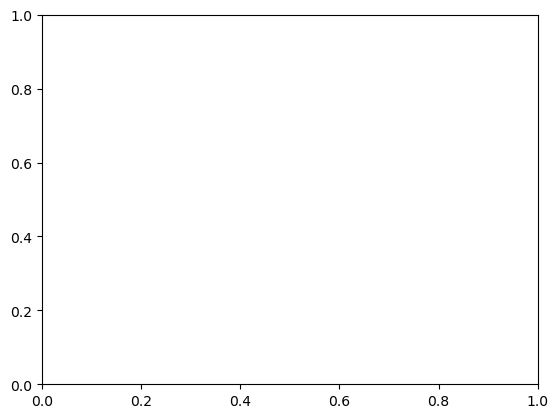

In [19]:
plt.plot(grouped_reset[grouped_reset['TRIP_EDGE']==1]['ADHERENCE']
         ,grouped_reset[grouped_reset['TRIP_EDGE']==2]['ADHERENCE'] )

In [20]:
grouped_reset['TRIP_EDGE'].iloc[1::2]

1         2
3         2
5         2
7         2
9         2
         ..
134699    1
134701    1
134703    1
134705    1
134707    1
Name: TRIP_EDGE, Length: 67354, dtype: int64

In [21]:

# Calculate differences
grouped_reset['differences'] = grouped_reset['TRIP_EDGE'].diff()

# Set a threshold for detecting breaks
threshold = 1
grouped_reset['periodicity_break'] = abs(grouped_reset['differences']) != threshold
grouped_reset

,trip_date,TRIP_EDGE,ADHERENCE,differences,periodicity_break
0,345104120230801,1,-2.133333,NaN,True
1,345104120230801,2,6.283333,1.0,False
2,345104120230802,1,-2.450000,-1.0,False
3,345104120230802,2,8.016666,1.0,False
4,345104120230803,1,-0.766666,-1.0,False
...,...,...,...,...,...
134704,354106120230927,2,-166.566666,1.0,False
134705,354106120230928,1,-2.566666,-1.0,False
134706,354106120230928,2,-5.816666,1.0,False
134707,354106120230929,1,-20.616666,-1.0,False


In [37]:
grouped_reset = grouped_reset[(grouped_reset['periodicity_break']==False) | (grouped_reset['differences'].isna())]

In [39]:
grouped_reset.groupby('trip_date')['TRIP_EDGE']

Text(0, 0.5, 'Adherence for the end of the trip')

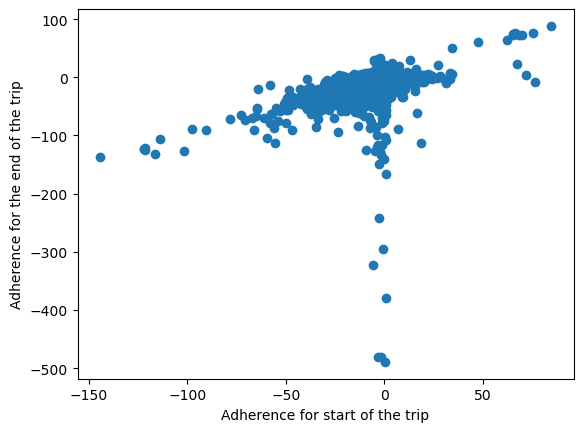

In [46]:
plt.plot(grouped_reset[grouped_reset['TRIP_EDGE']==1]['ADHERENCE']
         ,grouped_reset[grouped_reset['TRIP_EDGE']==2]['ADHERENCE'],'o')
plt.xlabel('Adherence for start of the trip')
plt.ylabel('Adherence for the end of the trip')

### some notes
- Actual Arrival time   32724
- Actual Departure time 32720
- Adherence             32720
- Scheduled Headway     32835
- Actual headway        31831
- Headway deviation     31773
- Dwell time            32720